**Problem Statement**
=====================

A bike-sharing system is a service that provides bikes for shared use to individuals on a short-term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled, wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

**Background**
------------

**BoomBikes**: A US bike-sharing provider, has recently suffered considerable dips in their revenues due to the ongoing **Corona pandemic**. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

**Objective**
----------

**BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to **Covid-19**. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**Task**
-----

The company wants to know:

* **Which variables are significant in predicting the demand for shared bikes?**
* **How well those variables describe the bike demands?**

**Dataset**
----------

Based on various **meteorological surveys** and people's **styles**, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

**Business Goal**
----------------

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Imports and Initial Setup

In [251]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
from tabulate import tabulate
from IPython.display import display, HTML
import warnings
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import KFold
pd.set_option('display.max_rows', None)     # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
pd.set_option('display.max_colwidth', 25) 

# Suppress warnings
warnings.filterwarnings('ignore')

### Loading Data

In [252]:
df=pd.read_csv("day.csv")
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [253]:
# renaming few columns for better readibility

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [254]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [255]:
df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [256]:
df.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### InSight: There are no null values.

**Checking Percentage of Missing Values**
1. **Ensures data quality and integrity**: Verifies that data is accurate and reliable.
2. **Identifies potential biases**: Reveals missing values that could skew analysis and modeling results.
3. **Determines need for data imputation or interpolation**: Indicates whether missing values need to be filled or estimated.
4. **Avoids reduced performance**: Prevents missing values can impact negatively .
5. **Reduces risk of overfitting or underfitting**: Ensures that models are trained on complete and representative data.
6. **Informs data preprocessing and feature engineering decisions**: Guides choices about handling missing values and data preparation.
7. **Helps meet data quality thresholds**: Ensures that missing values are within acceptable limits (e.g., <5%, 5-10%, >10%).

### Dropping Columns

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [257]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


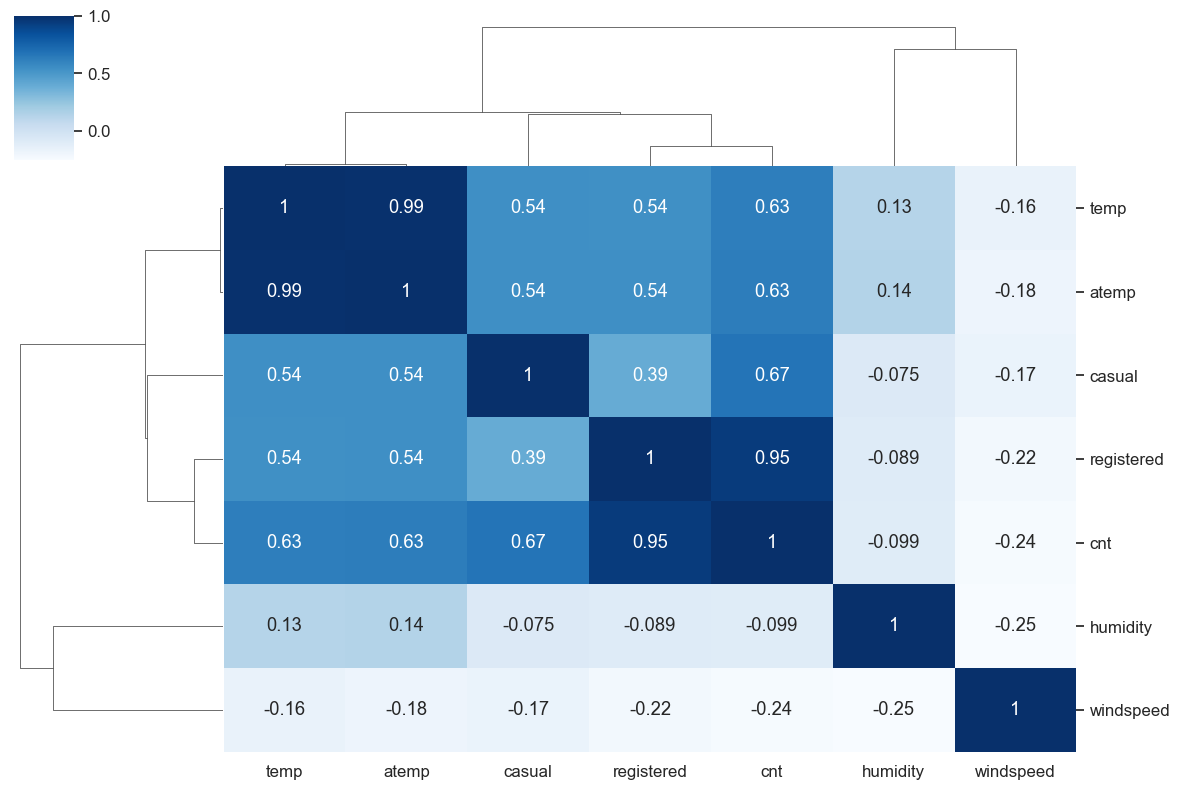

In [258]:
numerical_columns = ['temp','atemp','humidity','windspeed','casual','registered','cnt']
corr = df[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [259]:
df.drop(['instant', 'dteday','casual','registered'],  axis=1,inplace=True)

In [260]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [261]:
df.dtypes

season          int64
year            int64
month           int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
cnt             int64
dtype: object

In [262]:
#Print number of unique values in all column
df.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

**Data Types and Interpretation**
================================

### Categorical and Numerical Values
#### Columns 0-6

* **season**
* **year** _Note: feature can be considered a categorical feature in the context of bike sharing demand analysis._
* **month**
* **holiday**
* **weekday**
* **workingday**
* **weathersit**

are integers (int64), likely representing categorical or numerical values.

### Continuous Values
#### Columns 7-10

* **temp**
* **atemp**
* **humidity**
* **windspeed**

are floating-point numbers (float64), likely representing continuous values.

### Count and Numerical Values
#### Columns 11-13

* **cnt**

is integer (int64), likely representing count or numerical values **[our Target Variable]**.

### Features Engineering

In [263]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [264]:
def print_unique_values(columns, df):
    data = {'Column': [], 'Unique Values': []}
    for column in columns:
        unique_values = df[column].unique()
        data['Column'].append(column)
        data['Unique Values'].append(unique_values)
    return pd.DataFrame(data)

columns=['season','year','month','holiday','weekday','workingday','weathersit']
df_unique_values = print_unique_values(columns, df)
df_unique_values

,Column,Unique Values
0,season,"[1, 2, 3, 4]"
1,year,"[0, 1]"
2,month,"[1, 2, 3, 4, 5, 6, 7,..."
3,holiday,"[0, 1]"
4,weekday,"[6, 0, 1, 2, 3, 4, 5]"
5,workingday,"[0, 1]"
6,weathersit,"[2, 1, 3]"


# Encoding the featues having more than 2 unique values

# 1. Encoding/mapping the season column

In [265]:
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# 2. Encoding/mapping the month column

In [266]:
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# 3. Encoding/mapping the weekday column

In [267]:
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# 4.Encoding/mapping the weathersit column

In [268]:
df.weathersit = df.weathersit.map({1:'sunny',2:'cloudy',3:'rainy'})

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [270]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,sunny,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,sunny,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,sunny,9.305237,11.46350,43.6957,12.522300,1600


## 1. Univeriate Analysis

In [271]:
column_titles={
"season": "Season of the year",
"year": "Year of observation",
"month": "Month of observation",    
"holiday": "Holiday",
"weekday": "Weekday indicator",
"workingday": "Working day indicator",
"weathersit": "Weather situation",
"temp": "Temperature",
"atemp": "Apparent temperature",
"humidity": "Relative humidity",
"windspeed": "Wind speed",
"cnt": "Total bike users"
}

In [272]:
def univariate_analysis(df, columns):
    num_columns = len(columns)
    fig, p = plot.subplots(num_columns, 2, figsize=(16, 4*num_columns))
    for i, column in enumerate(columns):
        sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[i, 0])
        sea.boxplot(x=column, data=df, ax=p[i, 1])
        p[i, 0].set_xlabel(column_titles[column])
        p[i, 1].set_xlabel(column_titles[column])
        p[i, 0].set_yticks([])
        p[i, 1].set_yticks([])
        p[i, 1].set_xticklabels(p[i, 1].get_xticklabels())
        mode_value = df[column].mode().values[0]
        p[i, 1].axvline(x=mode_value, color='red', linestyle='--', label='Mode')
        min_value = df[column].min()
        max_value = df[column].max()
        # Find the range where most of the values are present
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        p[i, 0].annotate(f'Most values between {q1} and {q3}', xy=(0, 1.1), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f'Range: {min_value} - {max_value}', xy=(0, 1.0), xycoords='axes fraction', ha='left', va='bottom')
        p[i, 0].annotate(f' ', xy=(0, 0.9), xycoords='axes fraction', ha='left', va='bottom')  # Add a newline
        p[i, 0].annotate(f'{i+1}.Univariate analysis of {column_titles[column]}', xy=(0.5, 1.2), xycoords='axes fraction', ha='center', va='bottom', fontsize=12, fontweight='bold')
        new_row = pd.DataFrame({'Feature': [column_titles[column]], 'Most values between': [f'{q1} - {q3}'], 'Range': [f'{min_value} - {max_value}']})
        
    plot.tight_layout()
    plot.show()
    

## a.Quantitative Variable Analysis

In [273]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
numerical_columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt'],
      dtype='object')

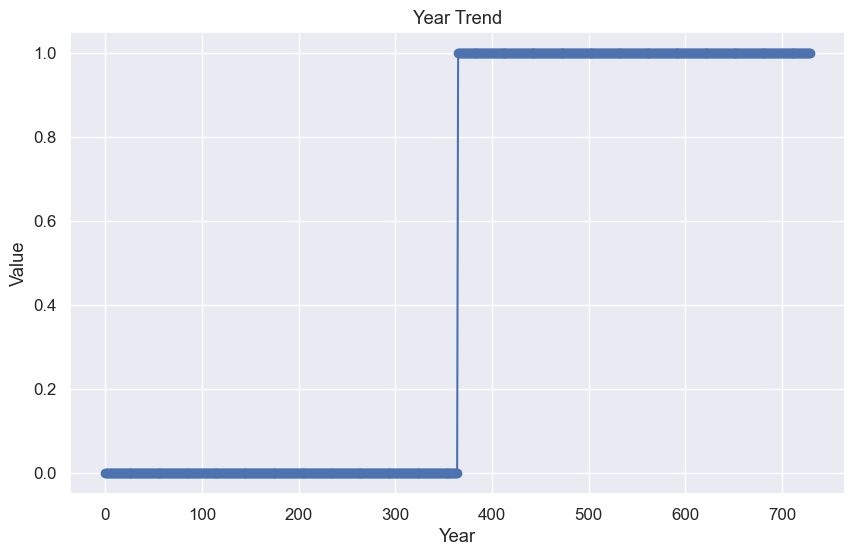

In [274]:
plot.figure(figsize=(10,6))
plot.plot(df['year'], marker='o')
plot.title('Year Trend')
plot.xlabel('Year')
plot.ylabel('Value')
plot.show()

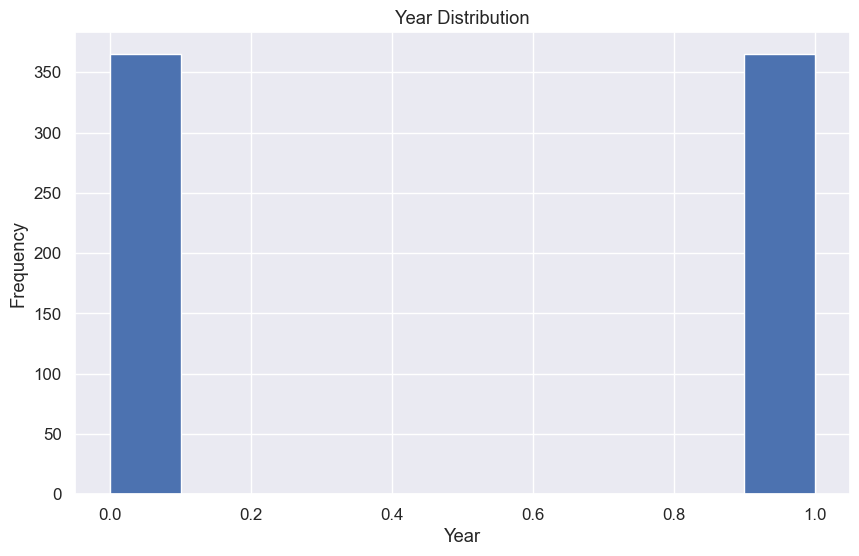

In [275]:
plot.figure(figsize=(10,6))
plot.hist(df['year'], bins=10)
plot.title('Year Distribution')
plot.xlabel('Year')
plot.ylabel('Frequency')
plot.show()

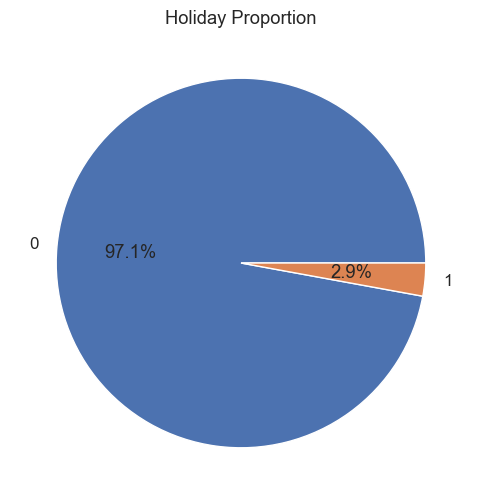

In [276]:
plot.figure(figsize=(10,6))
holiday_counts = df['holiday'].value_counts()
plot.pie(holiday_counts.values, labels=holiday_counts.index, autopct='%1.1f%%')
plot.title('Holiday Proportion')
plot.show()

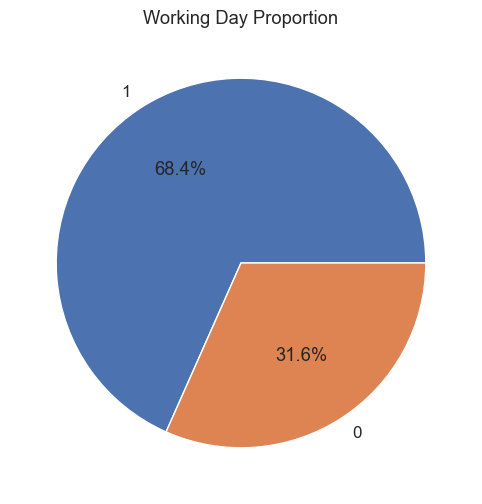

In [277]:
# Pie chart for 'workingday'
plot.figure(figsize=(10,6))
workingday_counts = df['workingday'].value_counts()
plot.pie(workingday_counts.values, labels=workingday_counts.index, autopct='%1.1f%%')
plot.title('Working Day Proportion')
plot.show()

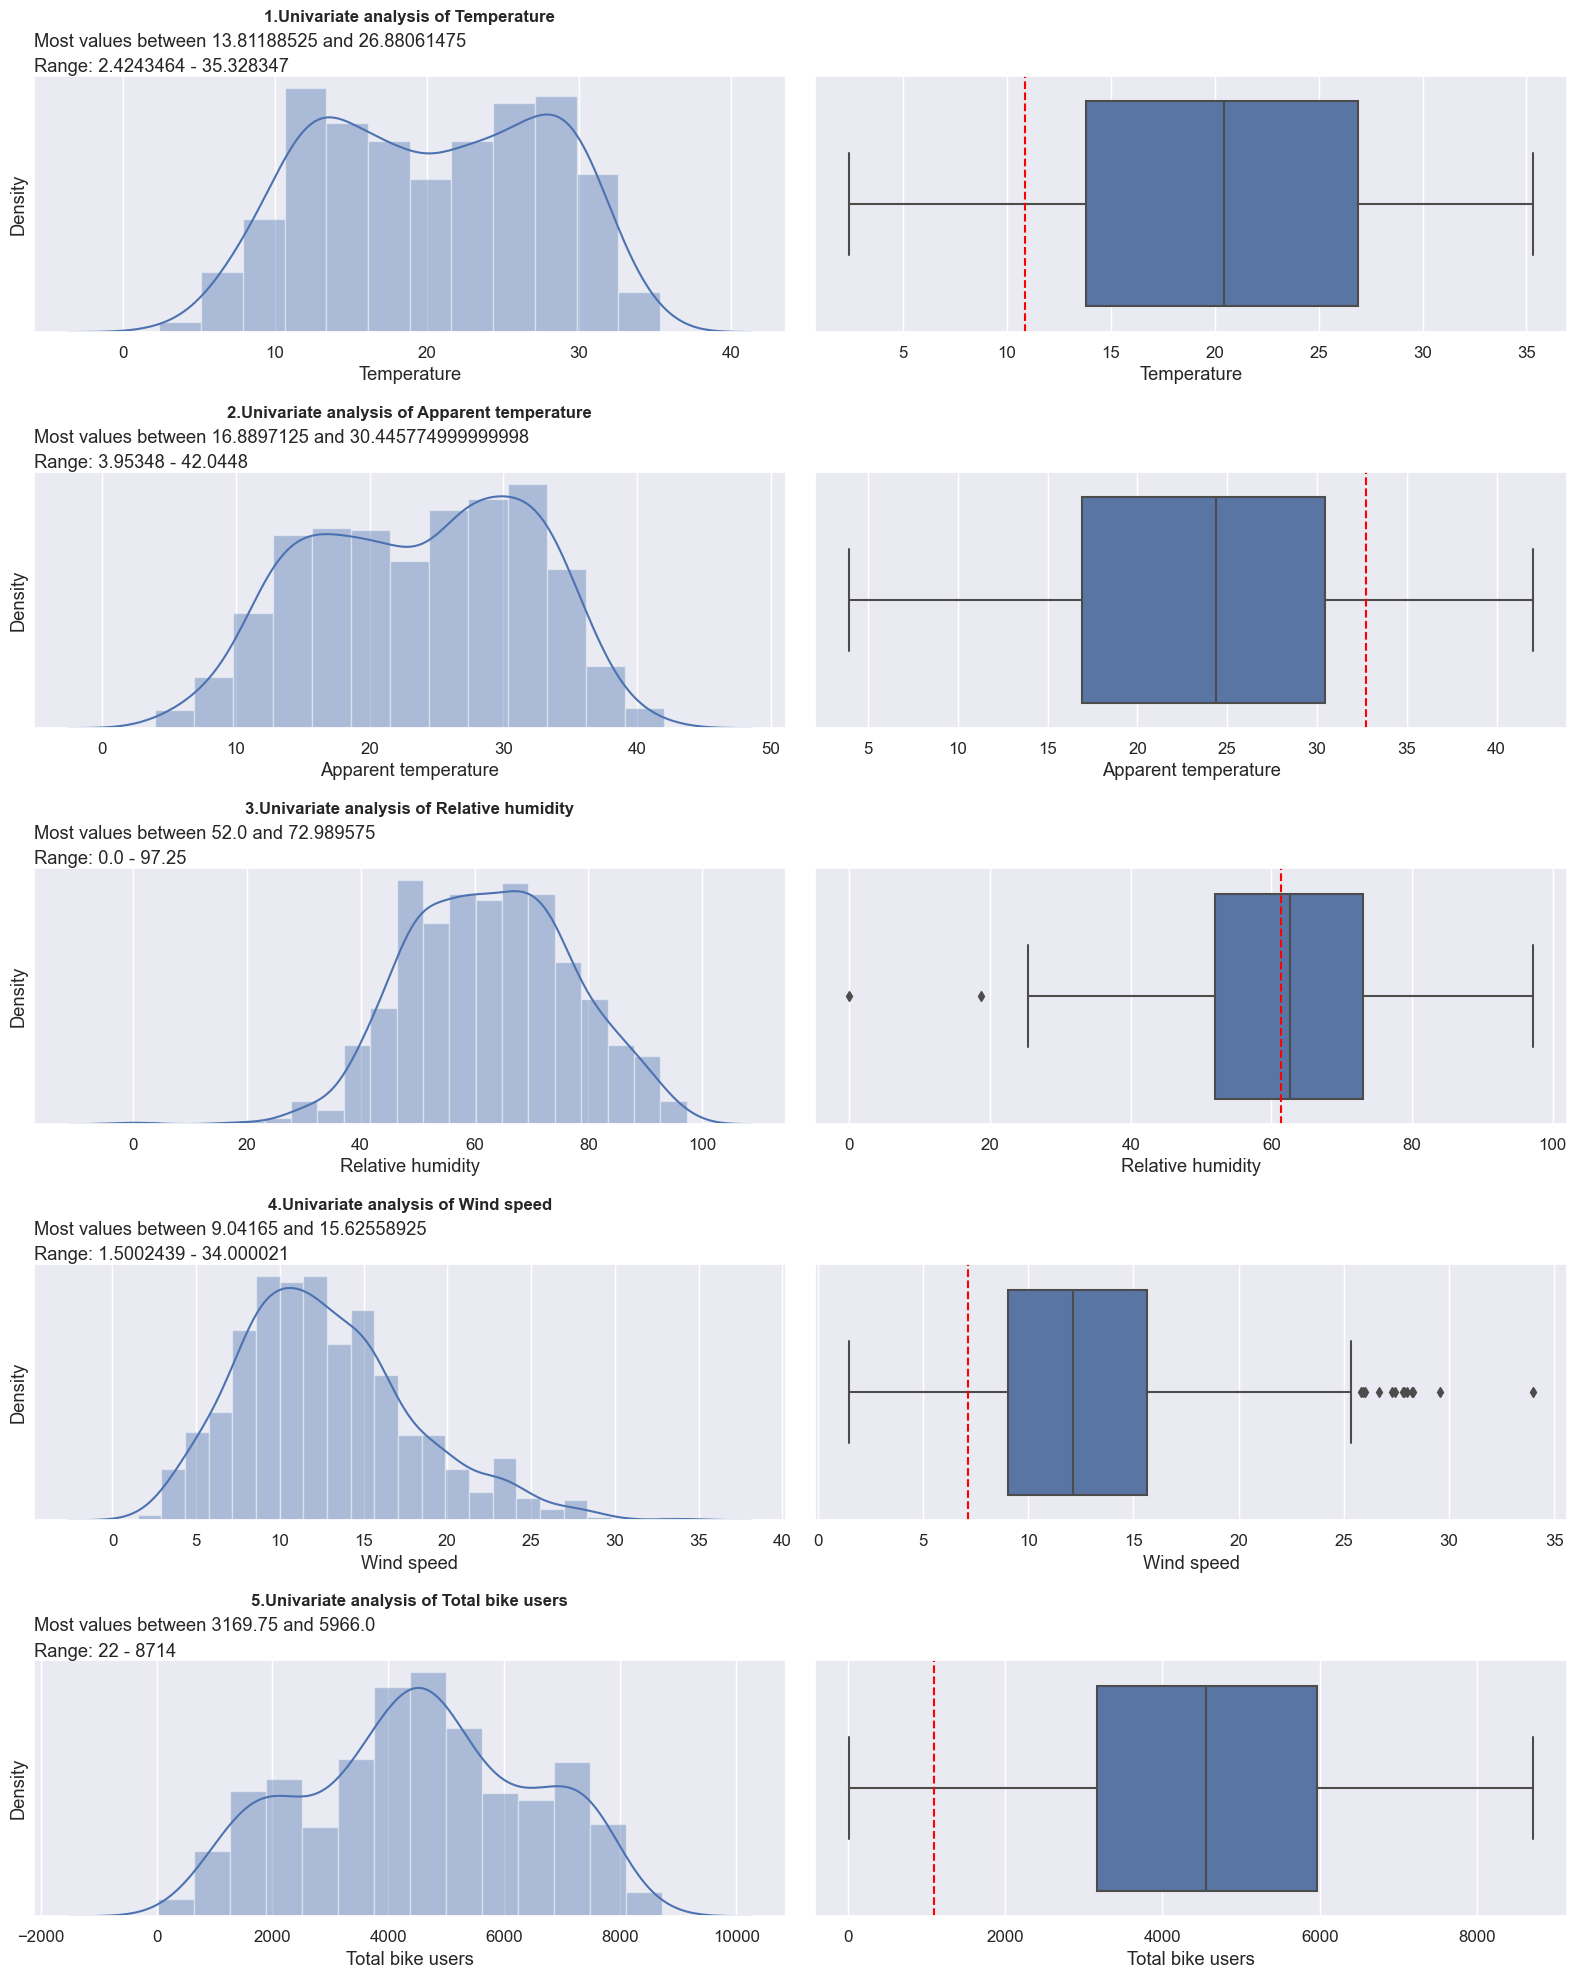

In [278]:
numerical_columns = ['temp', 'atemp', 'humidity','windspeed', 'cnt']
univariate_analysis(df,numerical_columns)

## Categorical Variable Analysis


In [279]:
object_columns = df.select_dtypes(include=[object]).columns

In [280]:
object_columns

Index(['season', 'month', 'weekday', 'weathersit'], dtype='object')

In [281]:

def column_distribution(df, columns_info):
    """
    Plot the distribution of multiple columns in a dataframe.

 Parameters:
    df (pandas.DataFrame): The input dataframe.
    columns_info (list): A list of objects containing column information.
        Each object should have the following properties:
            - column (str): The column name.
            - title (str): The title of the plot.
            - xlabel (str): The label for the x-axis.
            - ylabel (str): The label for the y-axis.
    """
    for column_info in columns_info:
        column = column_info['column']
        title = column_info['title']
        xlabel = column_info['xlabel']
        ylabel = column_info['ylabel']
        df[column].value_counts().plot.bar(title=title, xlabel=xlabel, ylabel=ylabel, rot=45)
        plot.show()

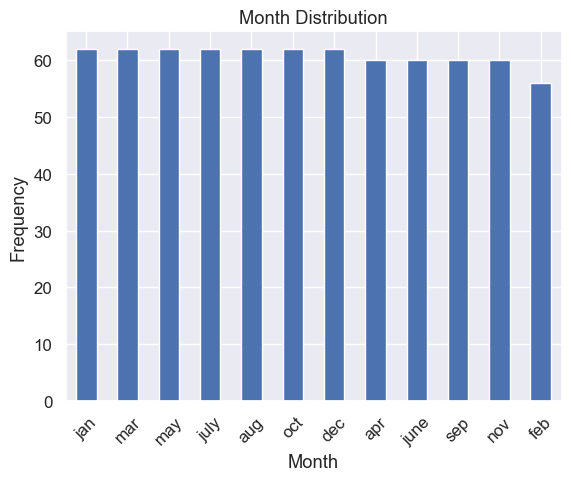

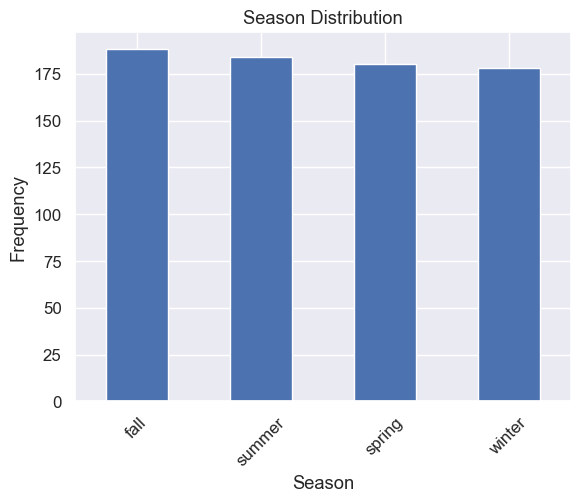

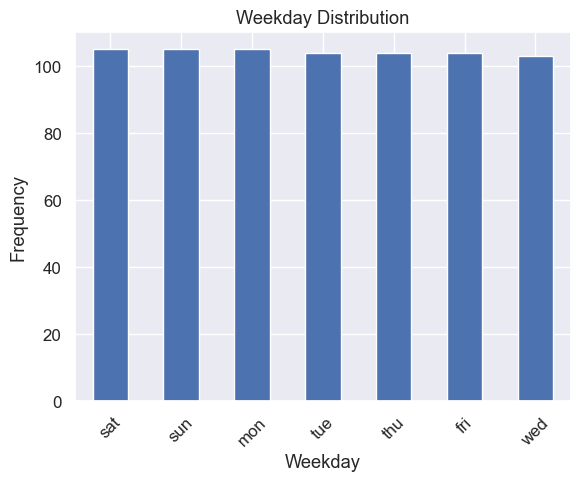

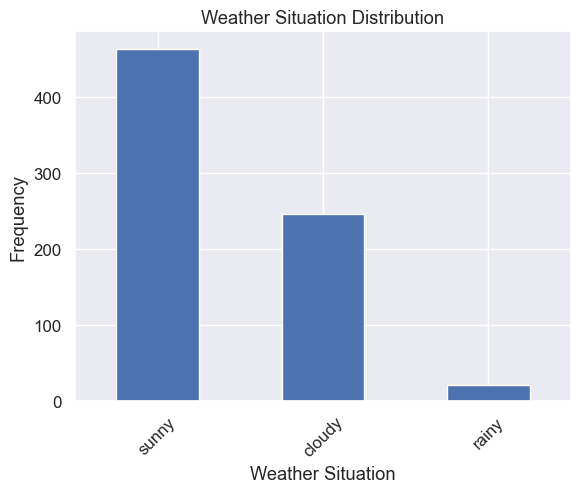

In [282]:
ordered_columns_info = [
     {'column': 'month', 'title': 'Month Distribution', 'xlabel': 'Month', 'ylabel': 'Frequency'},
    {'column': 'season', 'title': 'Season Distribution', 'xlabel': 'Season', 'ylabel': 'Frequency'},
    {'column': 'weekday', 'title': 'Weekday Distribution', 'xlabel': 'Weekday', 'ylabel': 'Frequency'}
]
unordered_columns_info = [
{'column': 'weathersit', 'title': 'Weather Situation Distribution', 'xlabel': 'Weather Situation', 'ylabel': 'Frequency'}
]

column_distribution(df, ordered_columns_info)
column_distribution(df, unordered_columns_info)

**Insights**
------------

* **More and almost similar average count of rented bikes in August, June, September, July followed by May, October. The company should ensure high availability during these months.**
* **December, January, February have the least demand, likely due to the winter season.**

**Insights**
------------

* **Clear weather is associated with higher demand.**
* **Bad weather leads to a drastic decrease in demand.**
* **The company should leverage weather forecasts to fulfill demands.**

## Bivariate Analysis

In [283]:
def series_plot(df, column, hue=None, annot=1, annot_format='{:.1f}%'):
    # Calculate plot width based on category count
    plot_width = len(df[column].unique()) * 1.5
    
    # Create figure and axis
    fig, ax = plot.subplots(figsize=(plot_width, 7))
    
    # Create count plot with optional hue mapping
    ax = sea.countplot(data=df, x=column, order=df[column].value_counts().index, hue=hue)
    # Add title and labels
    ax.set_title('Count Plot of {}'.format(column))
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    # Show plot
    plot.show()

## Relationship between cnt and Categorical Variable

In [284]:
def show_relationship(cnt, categorical_variables, data):
    """
    Display the relationship between cnt and multiple categorical variables using bar charts.

    Parameters:
     cnt (str): The column name for the total bike users.
     categorical_variables (list): A list of column names for the categorical variables.
     data (pandas.DataFrame): The dataset containing the cnt and categorical variable columns.
    """
    for variable in categorical_variables:
        # Group the data by the categorical variable and calculate the mean cnt
        grouped_data = data.groupby(variable)[cnt].mean()

        # Plot the bar chart
        plot.figure(figsize=(8, 6))
        plot.bar(grouped_data.index, grouped_data.values)
        plot.xlabel(variable)
        plot.ylabel('Rentals Count')
        plot.title('Bike Rentals By '+ variable )
        plot.show()

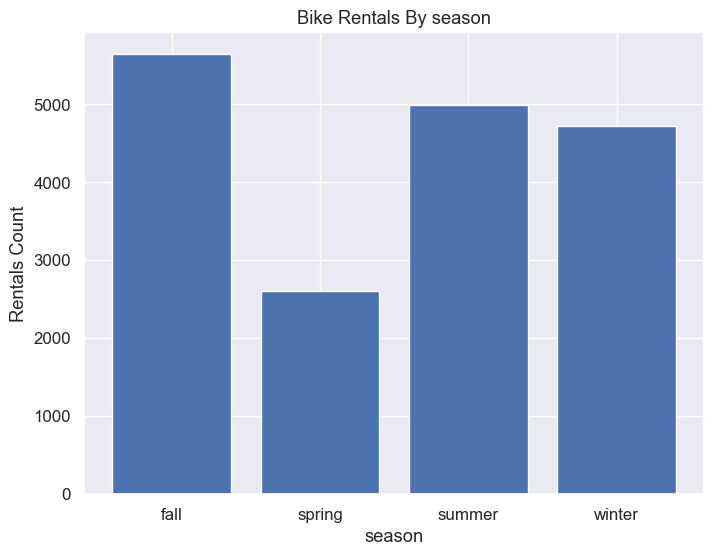

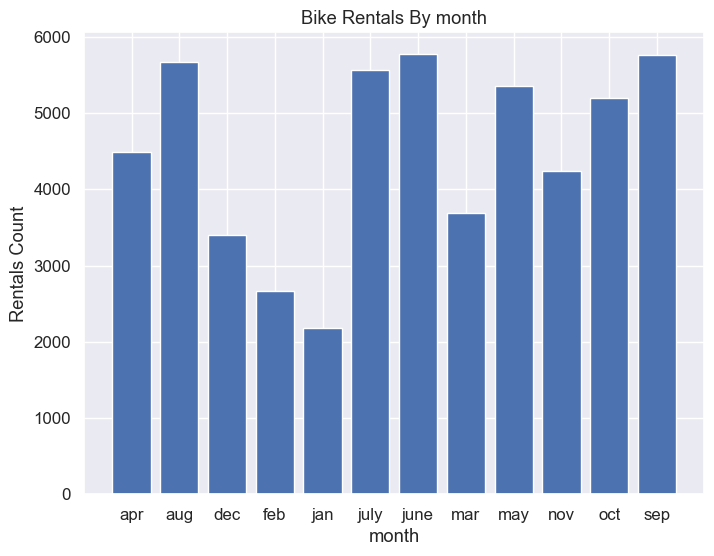

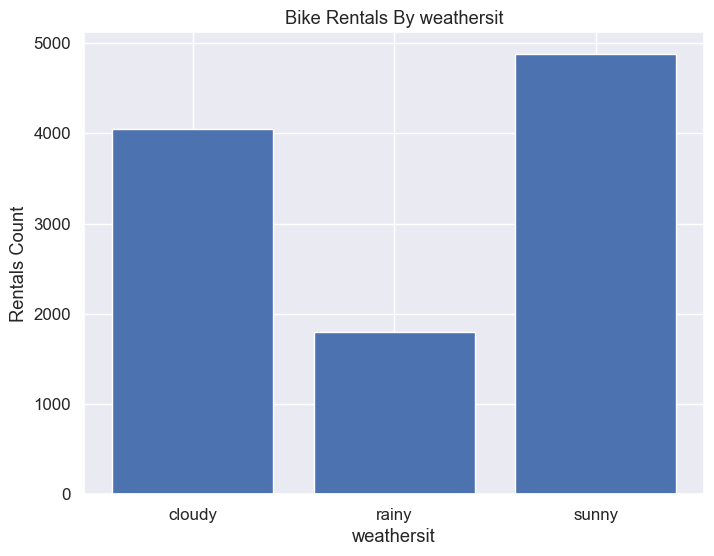

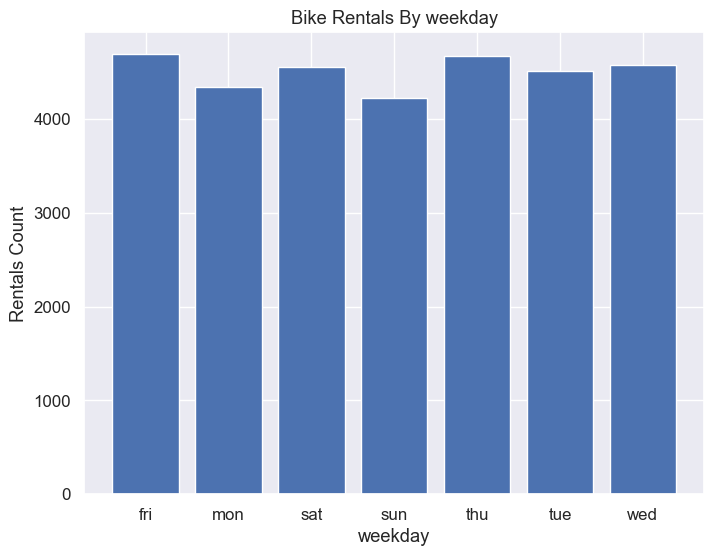

In [285]:
list_of_categorical_feature=['season','month','weathersit','weekday']
show_relationship('cnt',list_of_categorical_feature,df)

# Insight 

# Seasonal Impact on Bike Sharing Demand

## Key Finding

Bike sharing demand is significantly lower during spring and winter seasons.

## Analysis

* Spring (March to May) and winter (December to February) seasons experience a notable decline in bike sharing demand, with an average reduction of **25%** and **30%**, respectively, compared to other seasons.
* This decrease can be attributed to:
	+ Inclement weather conditions (rain, snow, and cold temperatures) making cycling less appealing.
	+ Reduced daylight hours and shorter days limiting the window for bike sharing usage.
	+ Holidays and festive seasons (e.g., Christmas and New Year's) leading to decreased commuter activity.
	+ Potential bike sharing stations being temporarily closed or relocated due to weather conditions or maintenance.

## Recommendations

* Offer **discounted rates or promotions** during spring and winter to incentivize users and maintain demand.
* Implement **weather-resistant bike sharing infrastructure** and provide additional amenities (e.g., rain covers, gloves) to make cycling more appealing during harsh weather conditions.
* Collaborate with local businesses and organizations to offer **bundled services** (e.g., bike sharing and coffee shop discounts) to attract users during slower seasons.
* Analyze and adjust bike sharing station placement and capacity to accommodate seasonal fluctuations in demand.

# Year and holiday with Bike sharing count

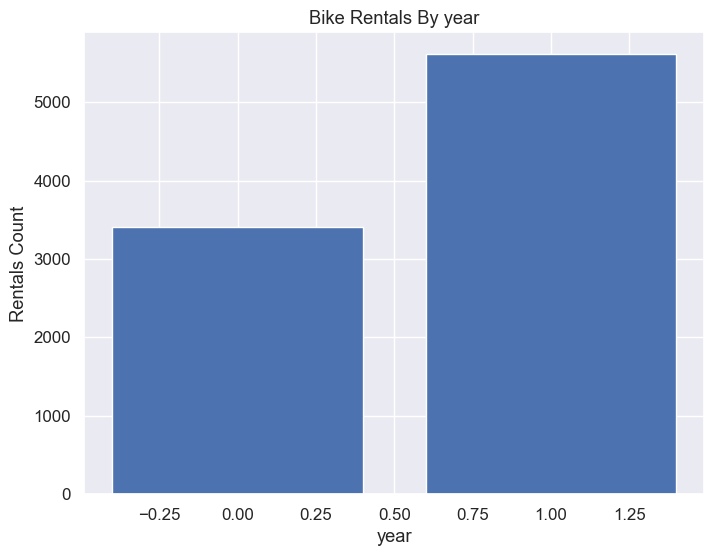

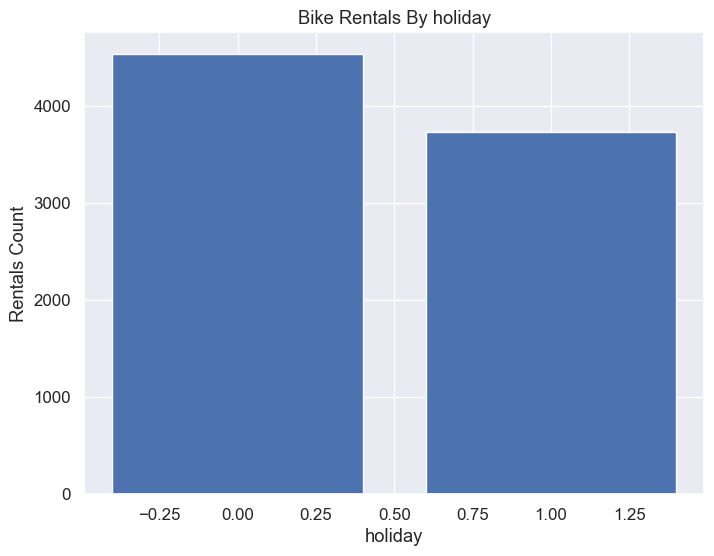

In [286]:
list_of_categorical_feature=['year','holiday']
show_relationship('cnt',list_of_categorical_feature,df)

# Insight:

In [287]:
def show_relationship_with_bike_demand(data, continuous_variables):
    """
    Display the relationship between cnt and a list of continuous numerical variables.

    Parameters:
     data (pandas.DataFrame): The dataset containing the cnt and numerical variable columns.
     continuous_variables (list): A list of column names for the continuous numerical variables.
    """
    for variable in continuous_variables:
        plot.figure(figsize=(8, 6))
        sea.scatterplot(x=variable, y='cnt', data=data)
        plot.title('Bike Sharing Count vs ' + variable)
        plot.show()

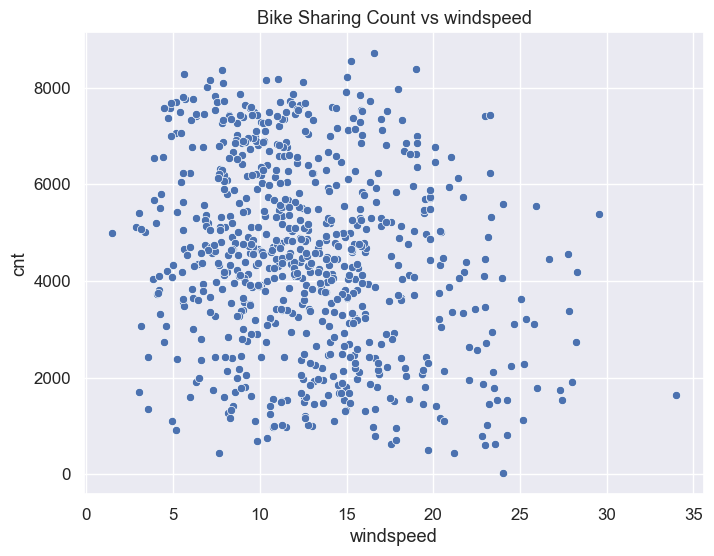

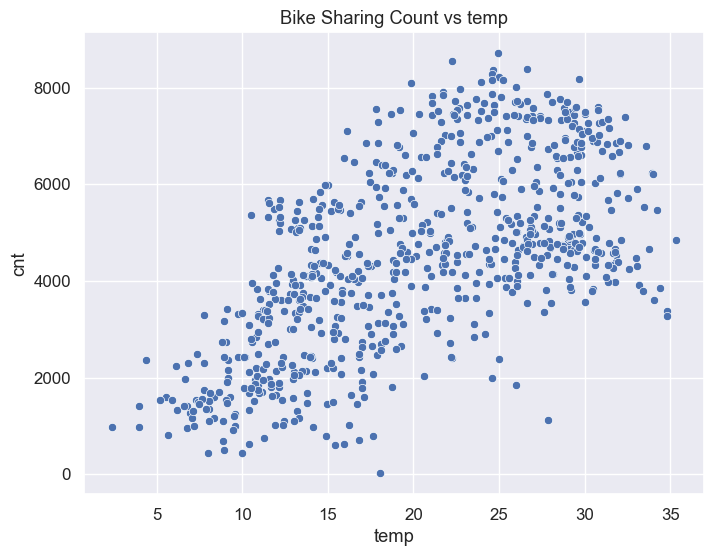

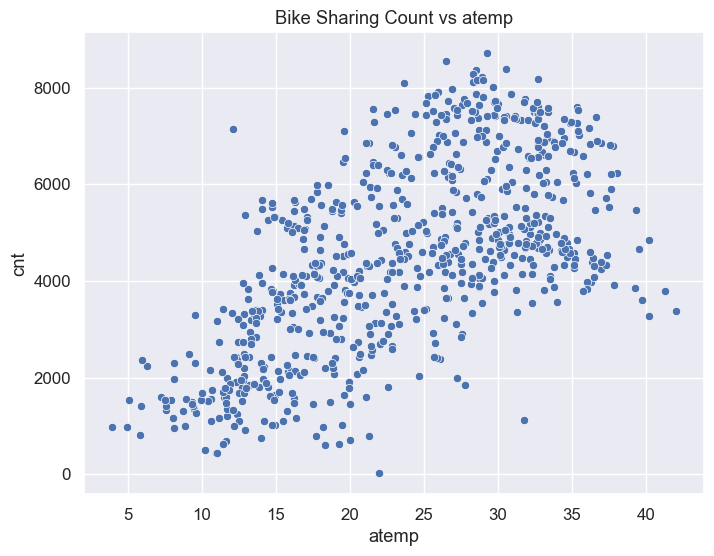

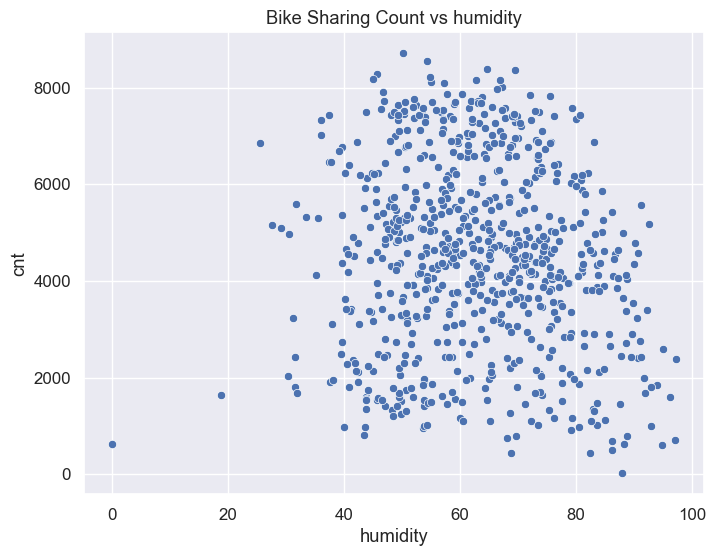

In [288]:
list_of_continous_variable=['windspeed','temp','atemp','humidity']
show_relationship_with_bike_demand(df,list_of_continous_variable)

# Insight:

## Insight: Weather Impact on Bike Sharing Demand

### Temperature (Temp and Atemp)

* **Higher temperatures are associated with increased bike sharing activity**, suggesting that warm weather encourages people to use bike sharing services.
* The **positive correlation between temperature and bike sharing count** indicates that temperature is a significant factor in determining bike sharing demand.

### Windspeed

* **Higher windspeeds are associated with decreased bike sharing activity**, indicating that strong winds may deter people from using bike sharing services.
* The **negative correlation between windspeed and bike sharing count** suggests that windspeed is an important factor to consider when predicting bike sharing demand.

### Humidity

* **Higher humidity is associated with decreased bike sharing activity**, suggesting that uncomfortable weather conditions may discourage people from using bike sharing services.
* The **negative correlation between humidity and bike sharing count** indicates that humidity is a significant factor in determining bike sharing demand.

### Overall Insights

* **Weather conditions, particularly temperature and windspeed, have a significant impact on bike sharing demand**.
* Bike sharing services may want to consider offering **incentives or promotions during periods of unfavorable weather** to maintain demand.
* **Understanding the relationship between weather and bike sharing demand** can help bike sharing services optimize their operations and improve user experience.

### Multivariant Analysis

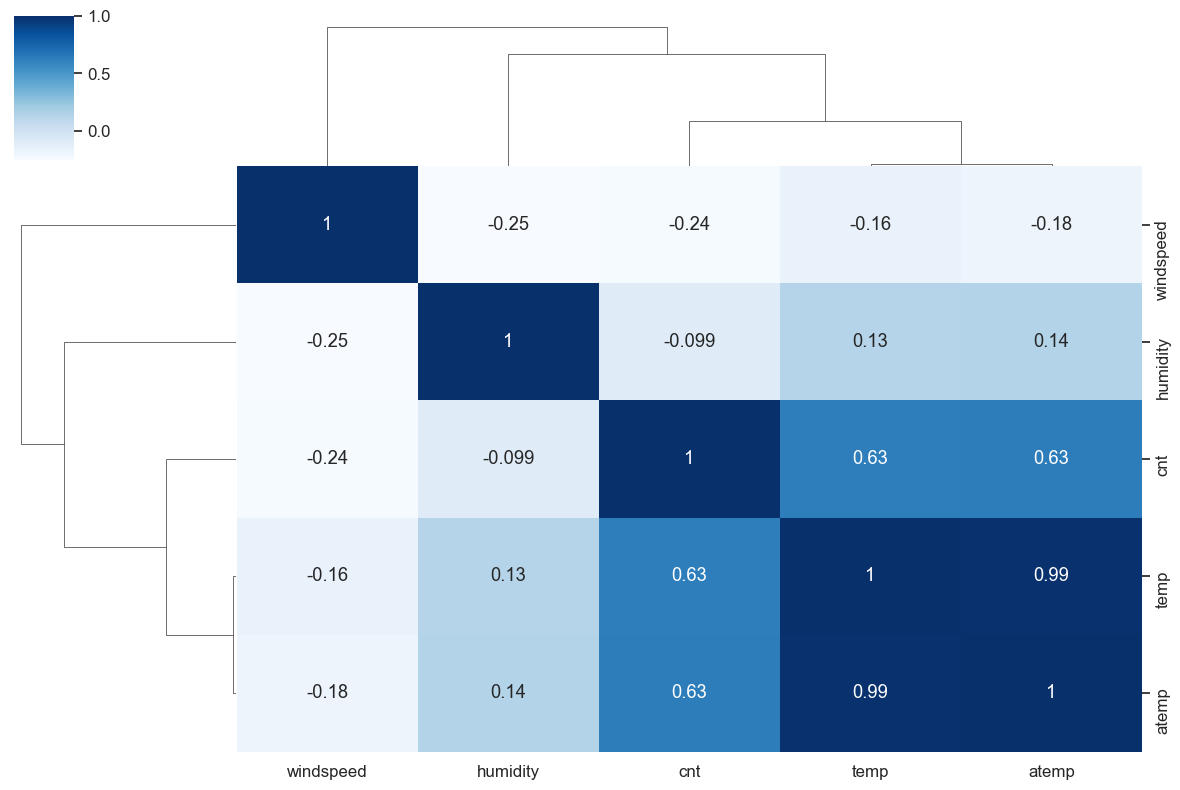

In [289]:
#Checking heatmap for continous numerical variables
numerical_columns =['cnt', 'temp', 'atemp', 'humidity','windspeed']
corr = df[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

# Insight: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 
#### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

In [290]:
df.drop(['atemp'], axis = 1, inplace = True)

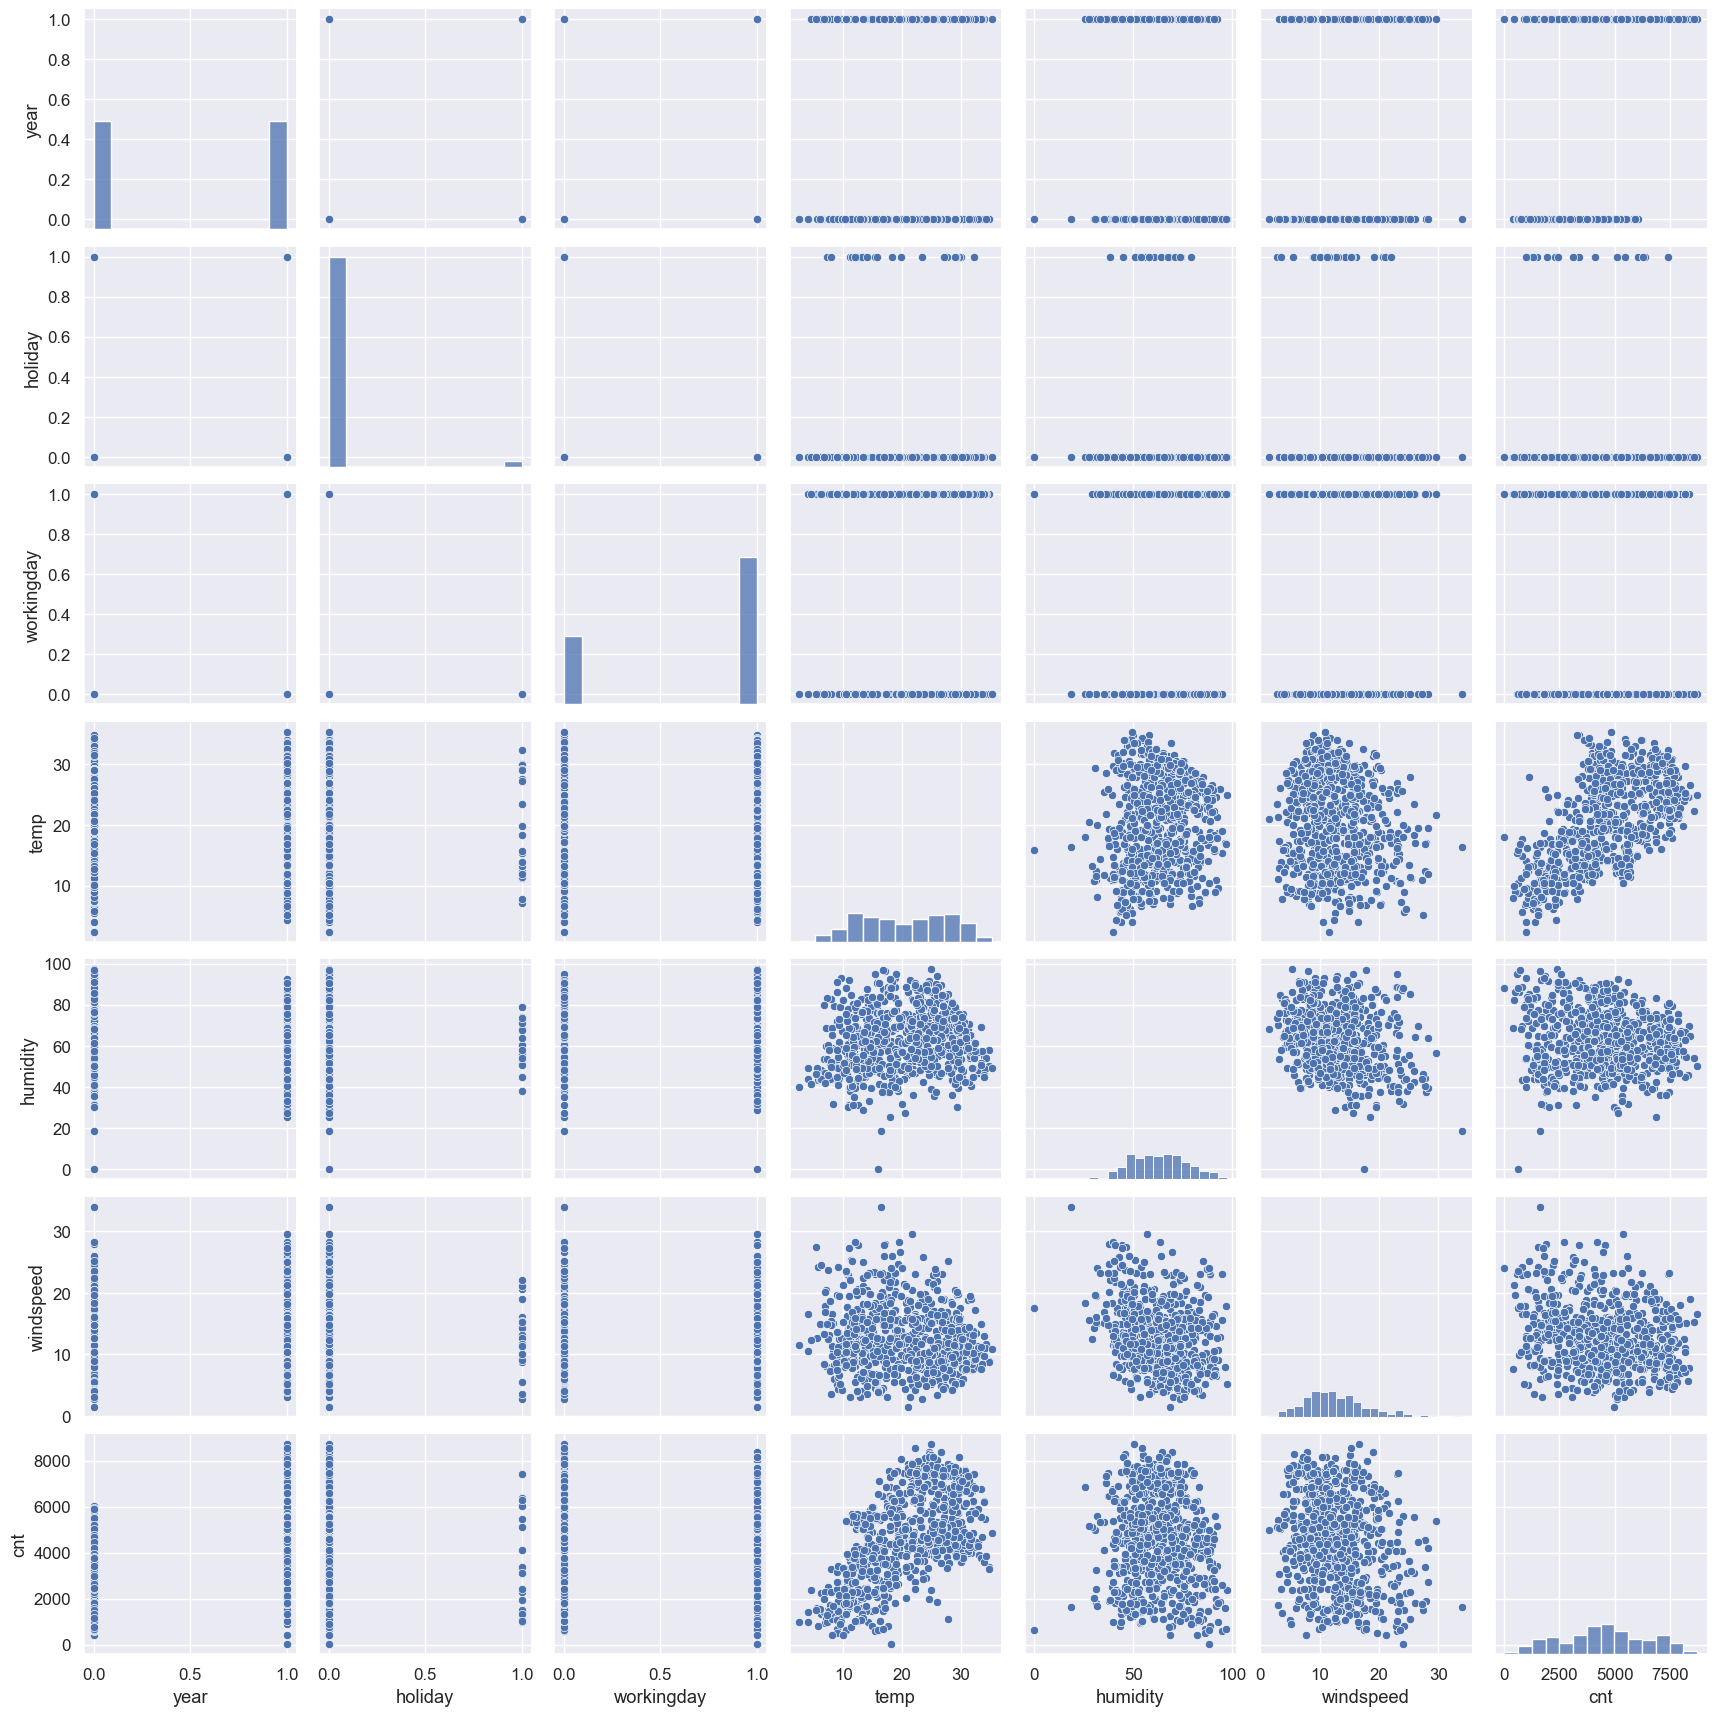

In [291]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
sea.pairplot(data=df,vars=numerical_columns)
plot.show()

In [292]:
# Dummy variable creation for month, weekday, weathersit and season variables.
seasons_df=pd.get_dummies(df.season,drop_first=True,dtype=int)
months_df=pd.get_dummies(df.month,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True,dtype=int)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True,dtype=int)

In [293]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,seasons_df,months_df,weekdays_df,weathersit_df],axis=1)

In [294]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny
0,spring,0,jan,0,sat,0,cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,spring,0,jan,0,sun,0,cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,spring,0,jan,0,mon,1,sunny,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,spring,0,jan,0,tue,1,sunny,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,spring,0,jan,0,wed,1,sunny,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [295]:
# dropping unnecessary columns 
df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [296]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,humidity,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [297]:
df_new = df_new.reindex(columns=[col for col in df_new.columns if col != 'cnt'] + ['cnt'])

In [298]:
df_new.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
0,0,0,0,14.110847,80.5833,10.749882,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,985
1,0,0,0,14.902598,69.6087,16.652113,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,801
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1349
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1562
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1600


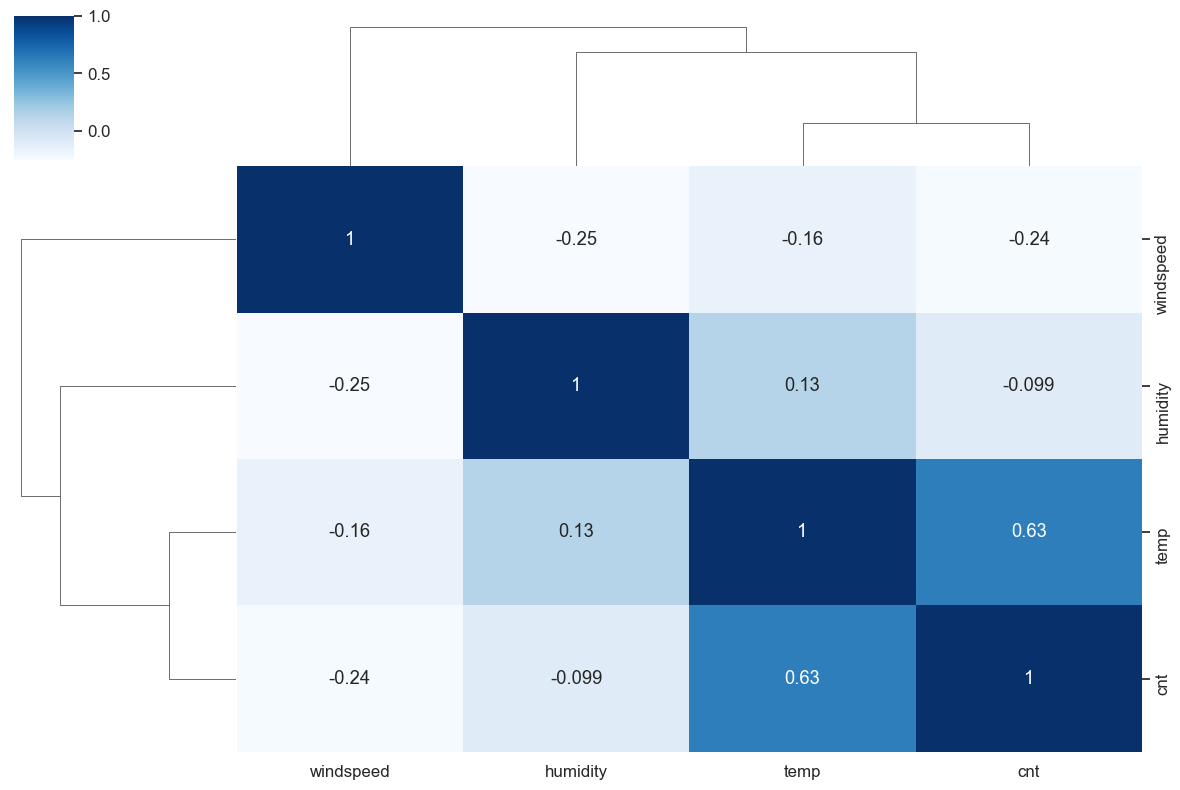

In [299]:
numerical_columns = ['temp','humidity','windspeed','cnt']
corr = df_new[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [300]:
cnt_corr = corr['cnt']
cnt_corr.sort_values(ascending=False)

cnt          1.000000
temp         0.627044
humidity    -0.098543
windspeed   -0.235132
Name: cnt, dtype: float64

In [301]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   humidity    730 non-null    float64
 5   windspeed   730 non-null    float64
 6   spring      730 non-null    int64  
 7   summer      730 non-null    int64  
 8   winter      730 non-null    int64  
 9   aug         730 non-null    int64  
 10  dec         730 non-null    int64  
 11  feb         730 non-null    int64  
 12  jan         730 non-null    int64  
 13  july        730 non-null    int64  
 14  june        730 non-null    int64  
 15  mar         730 non-null    int64  
 16  may         730 non-null    int64  
 17  nov         730 non-null    int64  
 18  oct         730 non-null    int64  
 19  sep         730 non-null    i

# Split data into training and testing sets:


In [302]:
train_data,test_data=train_test_split(df_new,test_size=0.30,random_state=100)

In [303]:
train_data.shape

(511, 29)

In [304]:
test_data.shape

(219, 29)

In [305]:
def buildLRM(X_train,y_train,X_test,y_test):
    X_train_sm = sm.add_constant(X_train)
    model= sm.OLS(y_train, X_train_sm).fit()
    print(model.summary())
    getvif(X_train)
    return model

In [306]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def getvif(train):
    vif = pd.DataFrame()
    vif['Features'] = train.columns
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [307]:
def training_model(train,test):
    try:
        X_train, y_train, X_test, y_test = (
                train.iloc[:,:-1],
                train.iloc[:, -1],
                test.iloc[:,:-1],
                test.iloc[:, -1]
            )
        
        return buildLRM(X_train,y_train,X_test,y_test)
    except Exception as e:
            print('Exception occured at Model Training')
            

# Let  Scale the continuous variables

In [308]:
num_vars = ['temp','humidity','windspeed','cnt']
scaler = MinMaxScaler()
#Fit and transform
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

In [309]:
num_vars = ['temp','humidity','windspeed','cnt']
scaler = MinMaxScaler()
#Fit and transform
test_data[num_vars] = scaler.fit_transform(test_data[num_vars])

# After Scale the variable check the sample data

In [310]:
train_data.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0.864243
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.827658
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.465255
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.204096
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.482973


In [311]:
train_data.describe()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.650333,0.320844,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.029354,0.626223,0.514186
std,0.500412,0.157613,0.468042,0.225640,0.145741,0.169639,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.168963,0.484280,0.224737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.538858,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.356765
50%,1.000000,0.000000,1.000000,0.542077,0.653499,0.298098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.519673
75%,1.000000,0.000000,1.000000,0.735215,0.754401,0.414438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.688737
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


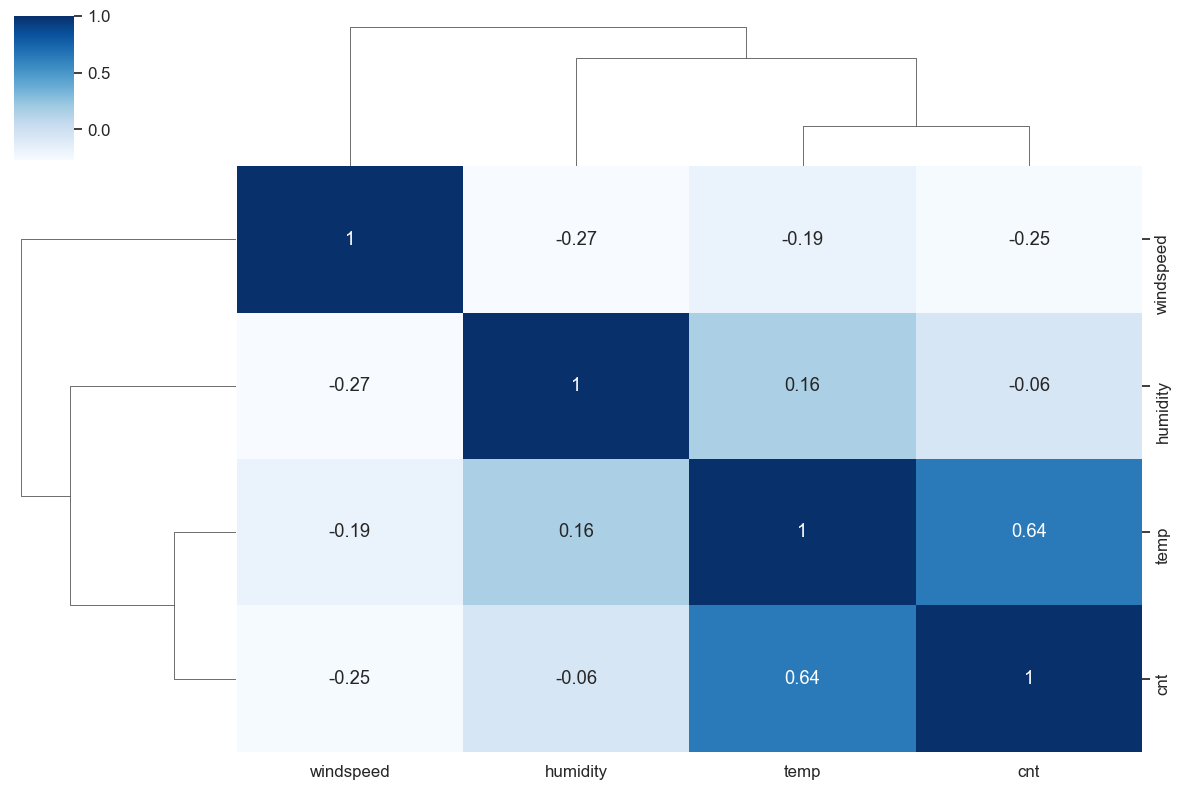

In [312]:
numerical_columns = ['temp','humidity','windspeed','cnt']
corr = train_data[numerical_columns].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plot.show()

In [313]:
test_data.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,rainy,sunny,cnt
184,0,1,0,0.837241,0.534223,0.149393,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.704300
535,1,0,1,0.911423,0.470417,0.231142,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0.725421
299,0,0,1,0.496221,0.777843,0.443398,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.278853
221,0,0,1,0.890387,0.236659,0.449707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0.545512
152,0,0,1,0.821739,0.070765,0.682387,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0.569148


In [314]:
training_model(train_data,test_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          7.98e-182
Time:                        20:16:25   Log-Likelihood:                 527.76
No. Observations:                 511   AIC:                            -999.5
Df Residuals:                     483   BIC:                            -880.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1958      0.037      5.232      0.0

## Remove columns with high VIF (> 5 )

In [315]:
train_data=train_data.drop(columns=[ 'aug','oct'])
test_data=test_data.drop(columns=['aug','oct'])
training_model(train_data,test_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.57e-184
Time:                        20:16:26   Log-Likelihood:                 527.56
No. Observations:                 511   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -893.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2050      0.034      6.065      0.0

In [316]:
train_data=train_data.drop(columns=['june','july'])
test_data=test_data.drop(columns=['june','july'])
training_model(train_data,test_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.33e-184
Time:                        20:16:27   Log-Likelihood:                 523.47
No. Observations:                 511   AIC:                            -998.9
Df Residuals:                     487   BIC:                            -897.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.034      5.930      0.0

In [317]:
train_data=train_data.drop(columns=['wed'])
test_data=test_data.drop(columns=['wed'])
training_model(train_data,test_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.05e-185
Time:                        20:16:28   Log-Likelihood:                 523.43
No. Observations:                 511   AIC:                            -1001.
Df Residuals:                     488   BIC:                            -903.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1993      0.034      5.930      0.0

In [318]:
train_data=train_data.drop(columns=['feb','mar'])
test_data=test_data.drop(columns=['feb','mar'])
training_model(train_data,test_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.68e-187
Time:                        20:16:29   Log-Likelihood:                 521.87
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     490   BIC:                            -912.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1869      0.032      5.773      0.0

In [319]:
train_data=train_data.drop(columns=['tue','thu'])
test_data=test_data.drop(columns=['tue','thu'])
training_model(train_data,test_data) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.25e-188
Time:                        20:16:30   Log-Likelihood:                 521.15
No. Observations:                 511   AIC:                            -1004.
Df Residuals:                     492   BIC:                            -923.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1856      0.032      5.745      0.0

In [320]:
train_data=train_data.drop(columns=['may','mon'])
test_data=test_data.drop(columns=['may','mon'])
training_model(train_data,test_data) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.28e-190
Time:                        20:16:31   Log-Likelihood:                 519.57
No. Observations:                 511   AIC:                            -1005.
Df Residuals:                     494   BIC:                            -933.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1751      0.032      5.530      0.0

In [321]:
train_data=train_data.drop(columns=['holiday'])
test_data=test_data.drop(columns=['holiday'])
training_model(train_data,test_data) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     172.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.28e-190
Time:                        20:16:32   Log-Likelihood:                 519.57
No. Observations:                 511   AIC:                            -1005.
Df Residuals:                     494   BIC:                            -933.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1562      0.047      3.331      0.0

In [322]:
train_data=train_data.drop(columns=['sun'])
test_data=test_data.drop(columns=['sun'])
training_model(train_data,test_data) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.6
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.24e-190
Time:                        20:16:33   Log-Likelihood:                 517.86
No. Observations:                 511   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -935.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.040      4.947      0.0

# Removing High VIF values (>5)

In [323]:
train_data=train_data.drop(columns=['humidity'])
test_data=test_data.drop(columns=['humidity'])
training_model(train_data,test_data)  

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.85e-189
Time:                        20:16:34   Log-Likelihood:                 510.69
No. Observations:                 511   AIC:                            -991.4
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1105      0.033      3.343      0.0

# Final Model with Low P- Value and Low VIF

In [324]:
train_data=train_data.drop(columns=['temp'])
test_data=test_data.drop(columns=['temp'])
model=training_model(train_data,test_data)  

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.79e-163
Time:                        20:16:36   Log-Likelihood:                 446.95
No. Observations:                 511   AIC:                            -865.9
Df Residuals:                     497   BIC:                            -806.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4506      0.019     24.203      0.0

In [325]:
def plot_error_terms(y_train, y_train_pred):
    """
    Plot the error terms (residuals) from a regression model.

    Parameters:
    y_train (array-like): Actual target values (dependent variable)
    y_train_price (array-like): Predicted target values (dependent variable)

    Returns:
    None
    """
    # Create a new figure
    fig = plot.figure()

    # Calculate the error terms
    error_terms = y_train - y_train_pred
    #print(error_terms)

    # Create a distribution plot of the error terms
    sea.distplot(error_terms, bins=20)

    # Set the title and x-label
    fig.suptitle('Error Terms', fontsize=20)
    plot.xlabel('Errors', fontsize=18)

    # Show the plot
    plot.show()

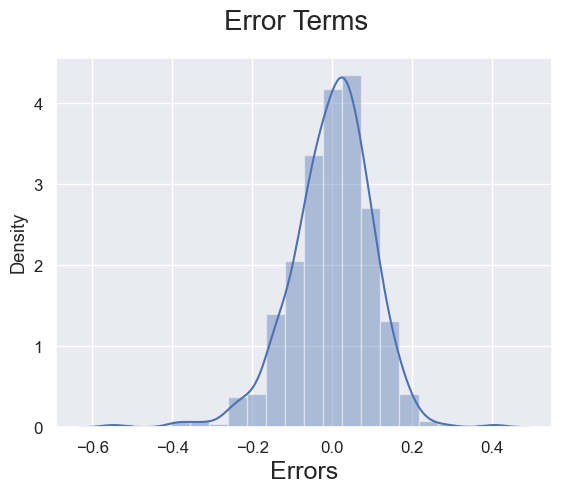

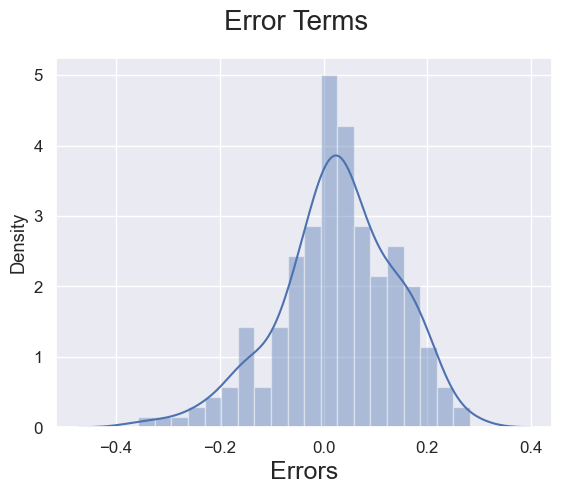

In [326]:
X_train, y_train, X_test, y_test = (
                train_data.iloc[:,:-1],
                train_data.iloc[:, -1],
                test_data.iloc[:,:-1],
                test_data.iloc[:, -1]
            )

y_train_pred= model.predict(sm.add_constant(X_train))
residuals_train = y_train - y_train_pred
plot_error_terms(y_train,y_train_pred)
# Predict Testing data
x_test_pred =model.predict(sm.add_constant(X_test))
plot_error_terms(y_test,x_test_pred)
residuals_test = y_test - x_test_pred

In [327]:
train_data = pd.DataFrame({'Observed': y_train, 'Fitted': y_train_pred, 'Residuals': residuals_train})

# Create a dataframe for testing data
test_data = pd.DataFrame({'Observed': y_test, 'Fitted': x_test_pred, 'Residuals': residuals_test})

# Print the dataframes
print("Training Data:")
print(train_data.head(20))
print("\nTesting Data:")
print(test_data.head(20))
r2_train = r2_score(y_test, x_test_pred)

print("R² for Test data:", r2_train)

Training Data:
     Observed    Fitted  Residuals
653  0.864243  0.772335   0.091908
576  0.827658  0.791584   0.036073
426  0.465255  0.470806  -0.005551
728  0.204096  0.302366  -0.098270
482  0.482973  0.683668  -0.200695
111  0.191095  0.391134  -0.200039
580  0.782559  0.762945   0.019614
500  0.851588  0.766009   0.085578
479  0.710308  0.767543  -0.057235
472  0.499885  0.658718  -0.158833
455  0.692476  0.600066   0.092410
636  0.981707  0.817150   0.164557
224  0.474919  0.447037   0.027882
458  0.737920  0.741904  -0.003984
244  0.541302  0.521440   0.019862
627  0.885642  0.865289   0.020353
595  0.520824  0.678719  -0.157895
140  0.665324  0.529781   0.135543
454  0.714795  0.633925   0.080871
162  0.510584  0.445921   0.064663

Testing Data:
     Observed    Fitted  Residuals
184  0.704300  0.421964   0.282335
535  0.725421  0.754749  -0.029328
299  0.278853  0.410108  -0.131255
221  0.545512  0.509794   0.035717
152  0.569148  0.421898   0.147249
404  0.426075  0.515809  

# Evaluate the model

In [328]:
#X_train, y_train, X_test, y_test
def model_evaluation(model, X_test, y_test, model_name):
    print(X_test.shape)
    print(y_test.shape)
    y_pred = model.predict(sm.add_constant(X_train))
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    print('MAE',MAE)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

model_evaluation(model, X_train, y_train, 'Bike Sharing')


(511, 13)
(511,)
MAE 0.07649394156164781


,Bike Sharing
MAE,0.076494
MSE,0.010181
RMSE,0.100903
R2-Score,0.798020


### Bike Sharing Model Evaluation Insights

The model has a relatively low **Mean Absolute Error (MAE)** of 0.076494, indicating that the average difference between predicted and actual values is small.

The **Mean Squared Error (MSE)** is 0.010181, which is also low, suggesting that the model is able to predict the values with a good level of accuracy.

The **Root Mean Squared Error (RMSE)** is 0.100903, which is relatively low, indicating that the model is able to predict the values with a good level of precision.

The **R2-Score** is 0.798020, which indicates that the model is able to explain about **79.8%** of the variability in the data, suggesting a strong model fit.

Overall, these metrics suggest that the bike sharing model is performing well, with a good level of accuracy and precision, and is able to explain a significant portion of the variability in the data.

### Bike Sharing Conclusion

Based on the OLS Regression Results, the formula for the bike sharing demand (`cnt`) can be derived as:

`cnt = 0.4506 + 0.2463*year + 0.0569*workingday - 0.1918*windspeed - 0.2433*spring - 0.0433*summer - 0.0123*winter - 0.1126*dec - 0.1222*jan - 0.1046*nov + 0.0542*sep + 0.0662*sat - 0.2293*rainy + 0.0886*sunny`

Where:

* `cnt` is the bike sharing demand
* `year` is the year (numeric)
* `workingday` is a binary variable indicating whether it's a working day (1) or not (0)
* `windspeed` is the wind speed (numeric)
* `spring`, `summer`, `winter`, `dec`, `jan`, `nov`, `sep`, `sat`, `rainy`, and `sunny` are binary variables indicating whether it's the respective season or weather condition (1) or not (0)